In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 9. College data set

In [2]:
college = pd.read_csv('../data/College.csv', index_col=0).dropna()
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

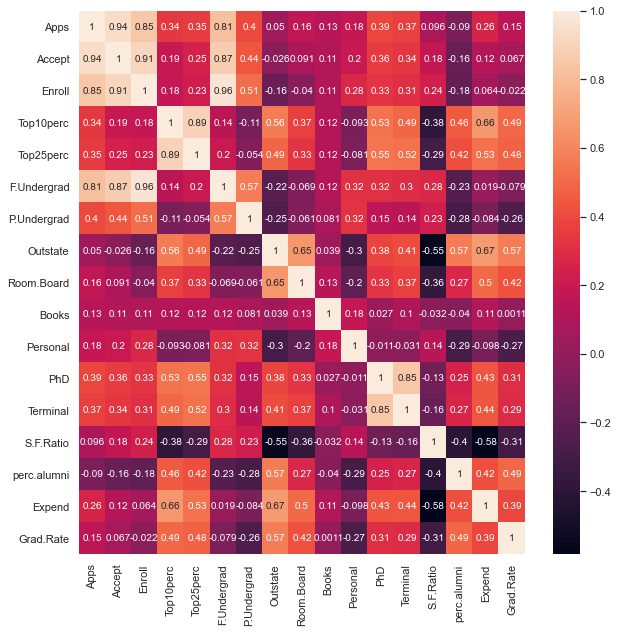

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.heatmap(college.corr(), annot=True, ax=ax);

In [7]:
# convert 'Private' to qualitative
college['Private'] = college['Private'].map({'Yes': 1, 'No': 0})
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [10]:
# 10.a
from sklearn.model_selection import train_test_split
X, y = college.drop(columns=['Apps']), college.Apps
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# sklearn import
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [13]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)
X_train_scaled[:2,]

array([[-1.66241883, -0.36665088, -0.30549464, -0.87518224, -1.55787255,
        -0.30189133, -0.44584342, -1.49541985, -1.31116256,  0.31699714,
        -0.16829723, -2.39987628, -3.09384961,  0.57820251, -1.03551167,
        -1.03478025, -0.30078181],
       [ 0.60153313, -0.52820612, -0.56682189, -0.25041791,  0.06432632,
        -0.39832388,  0.07781403, -0.12042589,  1.18176268,  1.53001883,
         0.27447505, -0.3928299 , -0.56812266,  0.07162271,  0.44352608,
        -0.68648177, -0.07341053]])

In [37]:
# 10.b Linear model
lin_reg = LinearRegression().fit(X_train_scaled, y_train)
mse_lin = mean_squared_error(y_test, lin_reg.predict(X_test_scaled))
mse_lin, np.sqrt(mse_lin)

(1714561.7191748442, 1309.4127382818774)

In [47]:
# 10.c Ridge reg. with CV
alphas=10**np.linspace(-2, 5, 100)
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error',
                   cv=None, # performs LOO cv efficiently
                   store_cv_values=True # LOO MSE, shape= (n_samples, n_alphas)
                  )
ridge_cv.fit(X_train_scaled, y_train)
ridge_cv.alpha_, ridge_cv.best_score_

(0.01, -1242653.960621692)

In [48]:
# test error
ridge_reg = Ridge(alpha=ridge_cv.alpha_).fit(X_train_scaled, y_train)
mse_rid = mean_squared_error(y_test, ridge_reg.predict(X_test_scaled))
mse_rid, np.sqrt(mse_rid)

(1714372.5209149553, 1309.3404908254213)

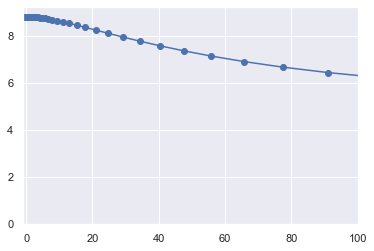

In [49]:
# plot CV MSEs vs. alphas
ridge_cv_scores = np.mean((ridge_cv.cv_values_)*-1, axis=0)
plt.plot(alphas, ridge_cv_scores, 'b-o')
plt.xlim([-1, 100]);

Above plot doesn't make sense. I was expecting something like a u-shaped curve with a minimum at 0.01

In [52]:
# 10.d Lasso with CV
lasso_cv = LassoCV(alphas=alphas)
lasso_cv.fit(X_train_scaled, y_train)
lasso_cv.alpha_

0.01

In [53]:
lasso_reg = Lasso(alpha=lasso_cv.alpha_).fit(X_train_scaled, y_train)
mse_las = mean_squared_error(y_test, lasso_reg.predict(X_test_scaled))
mse_las, np.sqrt(mse_las)

(1714524.5695282014, 1309.3985525913038)

In [59]:
lasso_reg.coef_

array([-287.80203525, 4103.10661663, -902.70640411,  910.2687095 ,
       -295.64418649,  257.36319512,  -33.45897439, -285.88800424,
        175.57042007,   18.60865786,   25.394671  , -171.34691183,
        -21.15440899,   19.50114528,   -6.30153219,  216.73343184,
        150.62312398])

NONE of the coeffificents are set to zeros. Not surprising since alpha=0.01

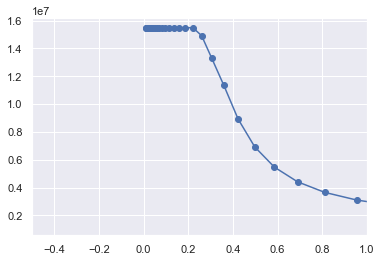

In [58]:
lasso_cv_scores = np.mean(lasso_cv.mse_path_, axis=1)
plt.plot(alphas, lasso_cv_scores, 'b-o')
plt.xlim([-.5, 1])
plt.show();